# Pdf text extraction methods
Exploring different libraries

1. easyOCR

In [ ]:
!apt-get install poppler-utils # works only on Linux ## pdf viewer in linux

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 174 kB of archives.
After this operation, 754 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 poppler-utils amd64 0.86.1-0ubuntu1.1 [174 kB]
Fetched 174 kB in 0s (369 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 122541 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.86.1-0ubuntu1.1_amd64.deb ...
Unpacking poppler-utils (0.86.1-0ubuntu1.1) ...
Setting up poppler-utils (0.86.1-0ubuntu1.1) ...
Processing triggers for man-db (2.9.1-1) ...


In [ ]:
!pip install pdf2image
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 19.2 MB/s eta 0:00:00


In [ ]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

In [ ]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
#!wget https://writing.colostate.edu/guides/documents/resume/functionalSample.pdf

In [ ]:
images = convert_from_path('Data-Analyst-Resume-2.pdf')

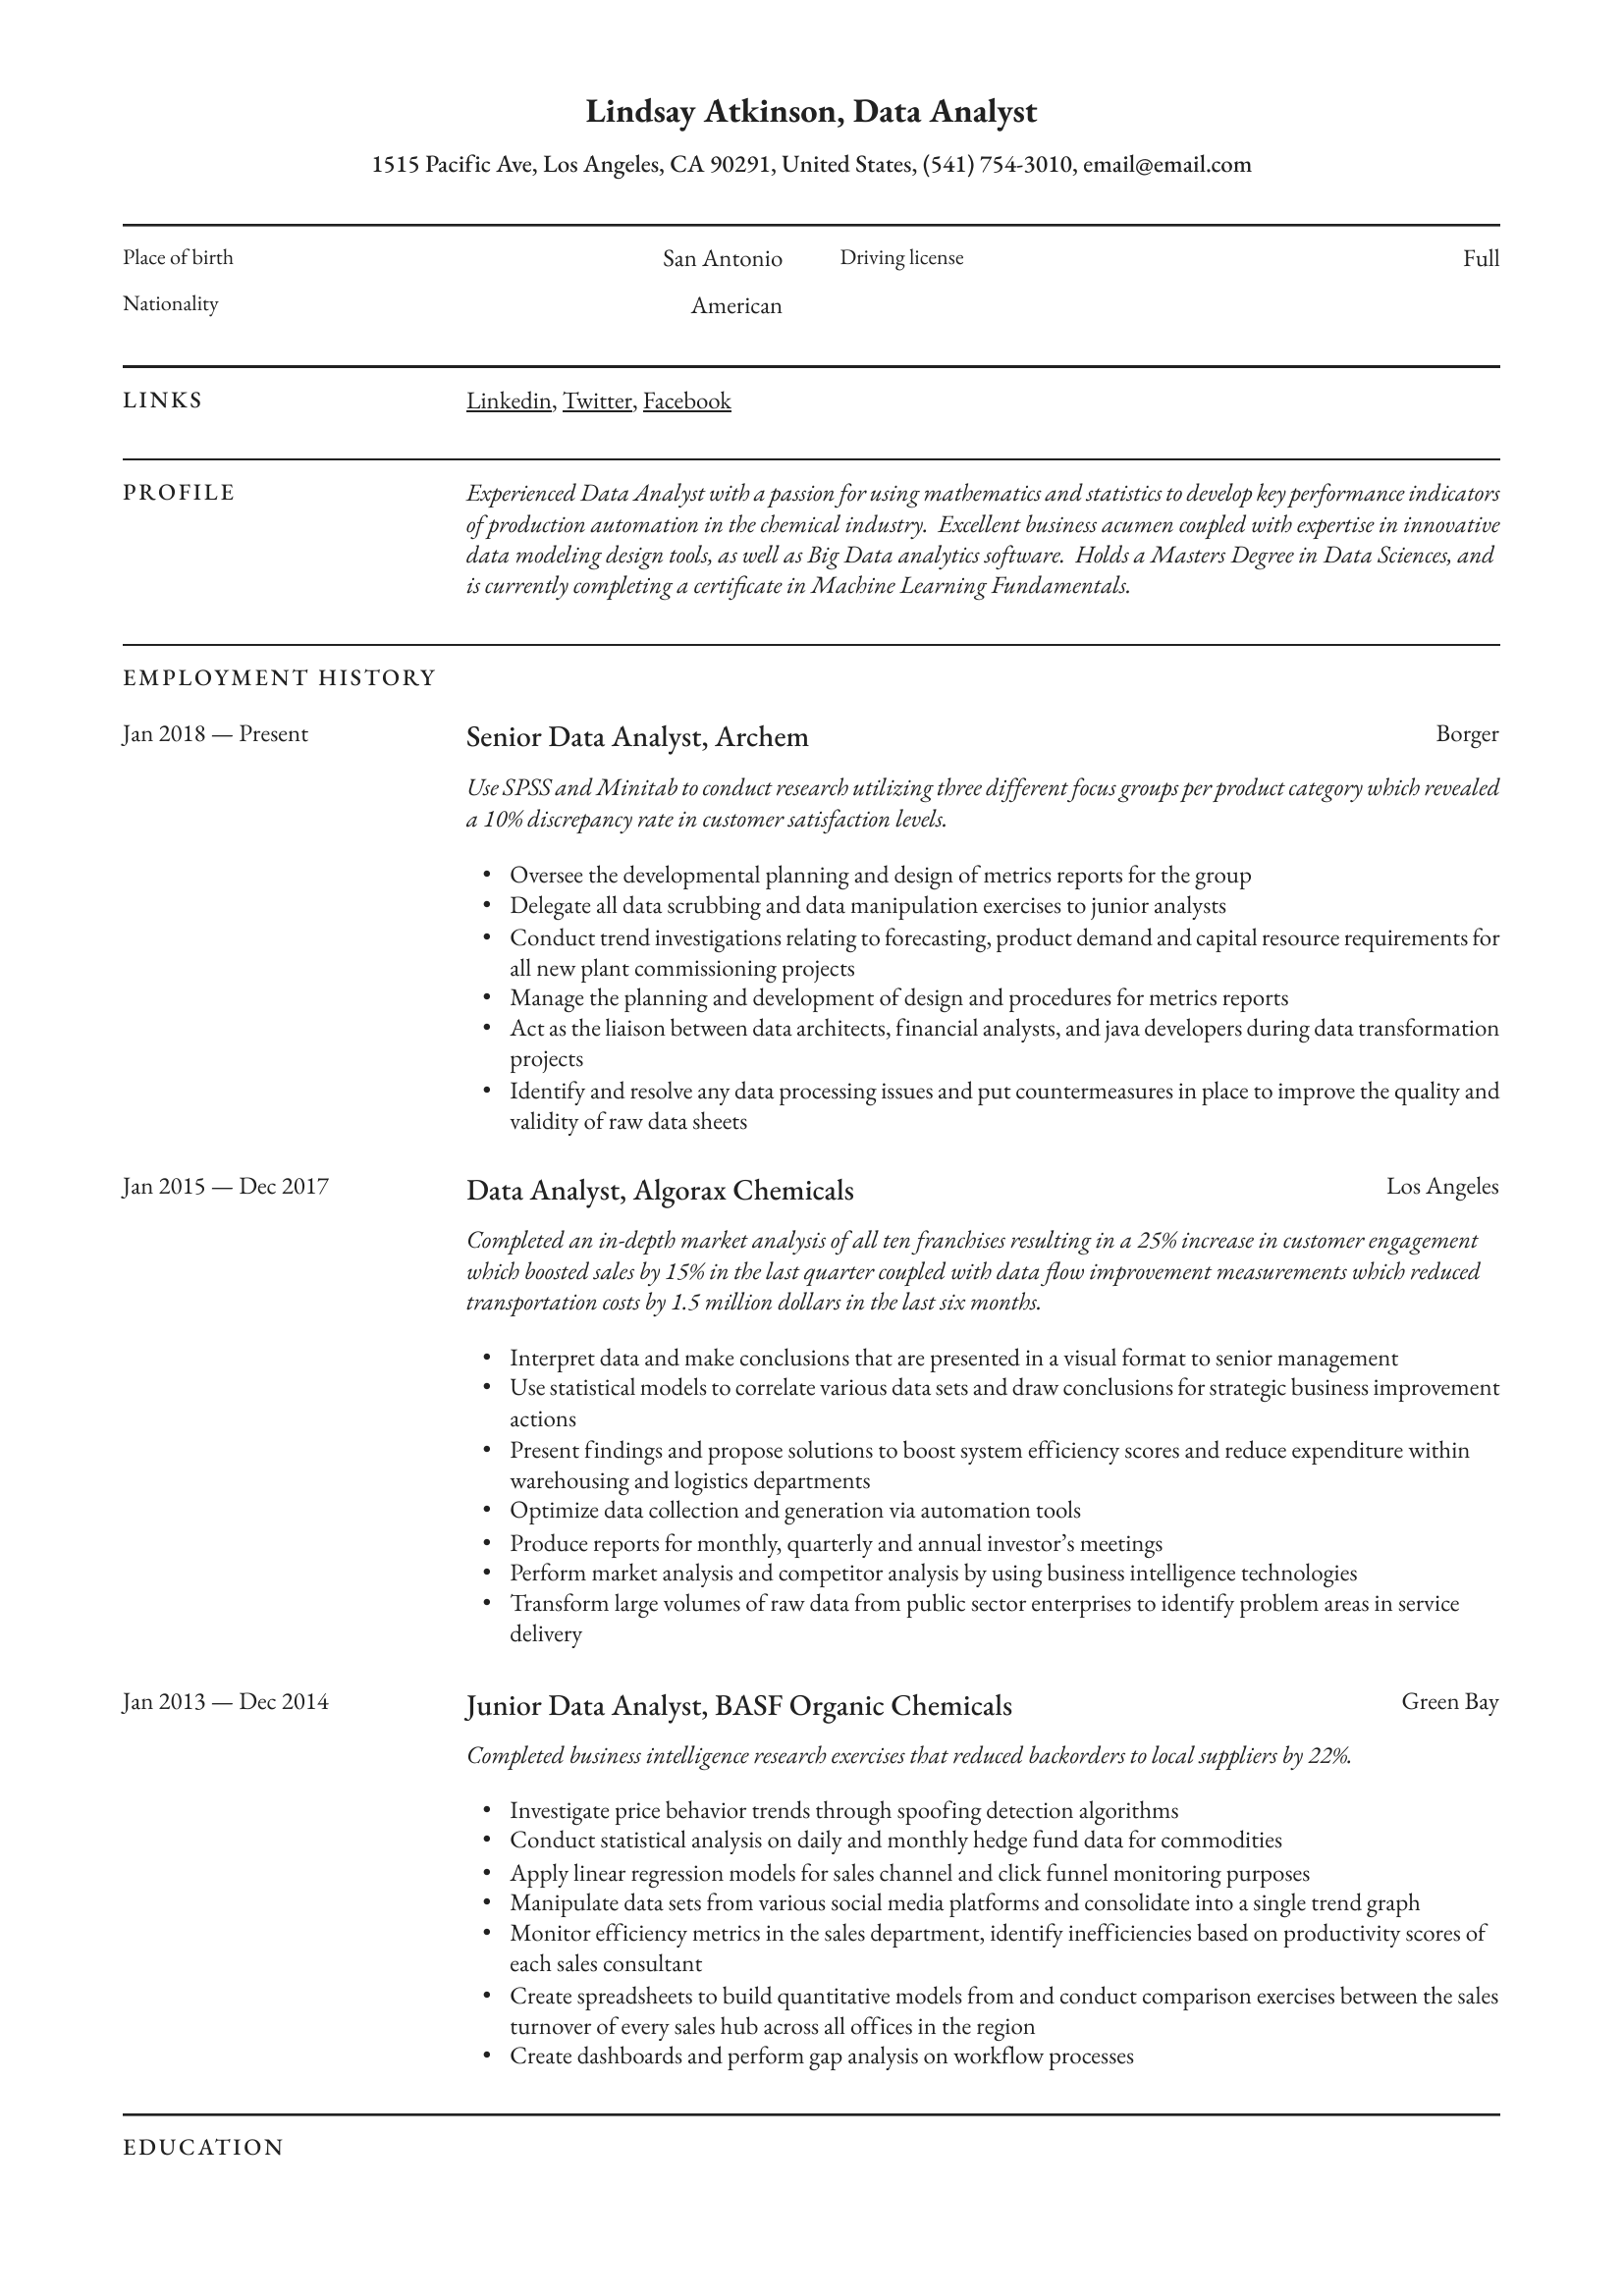

In [ ]:
from IPython.display import display, Image
display(images[0])

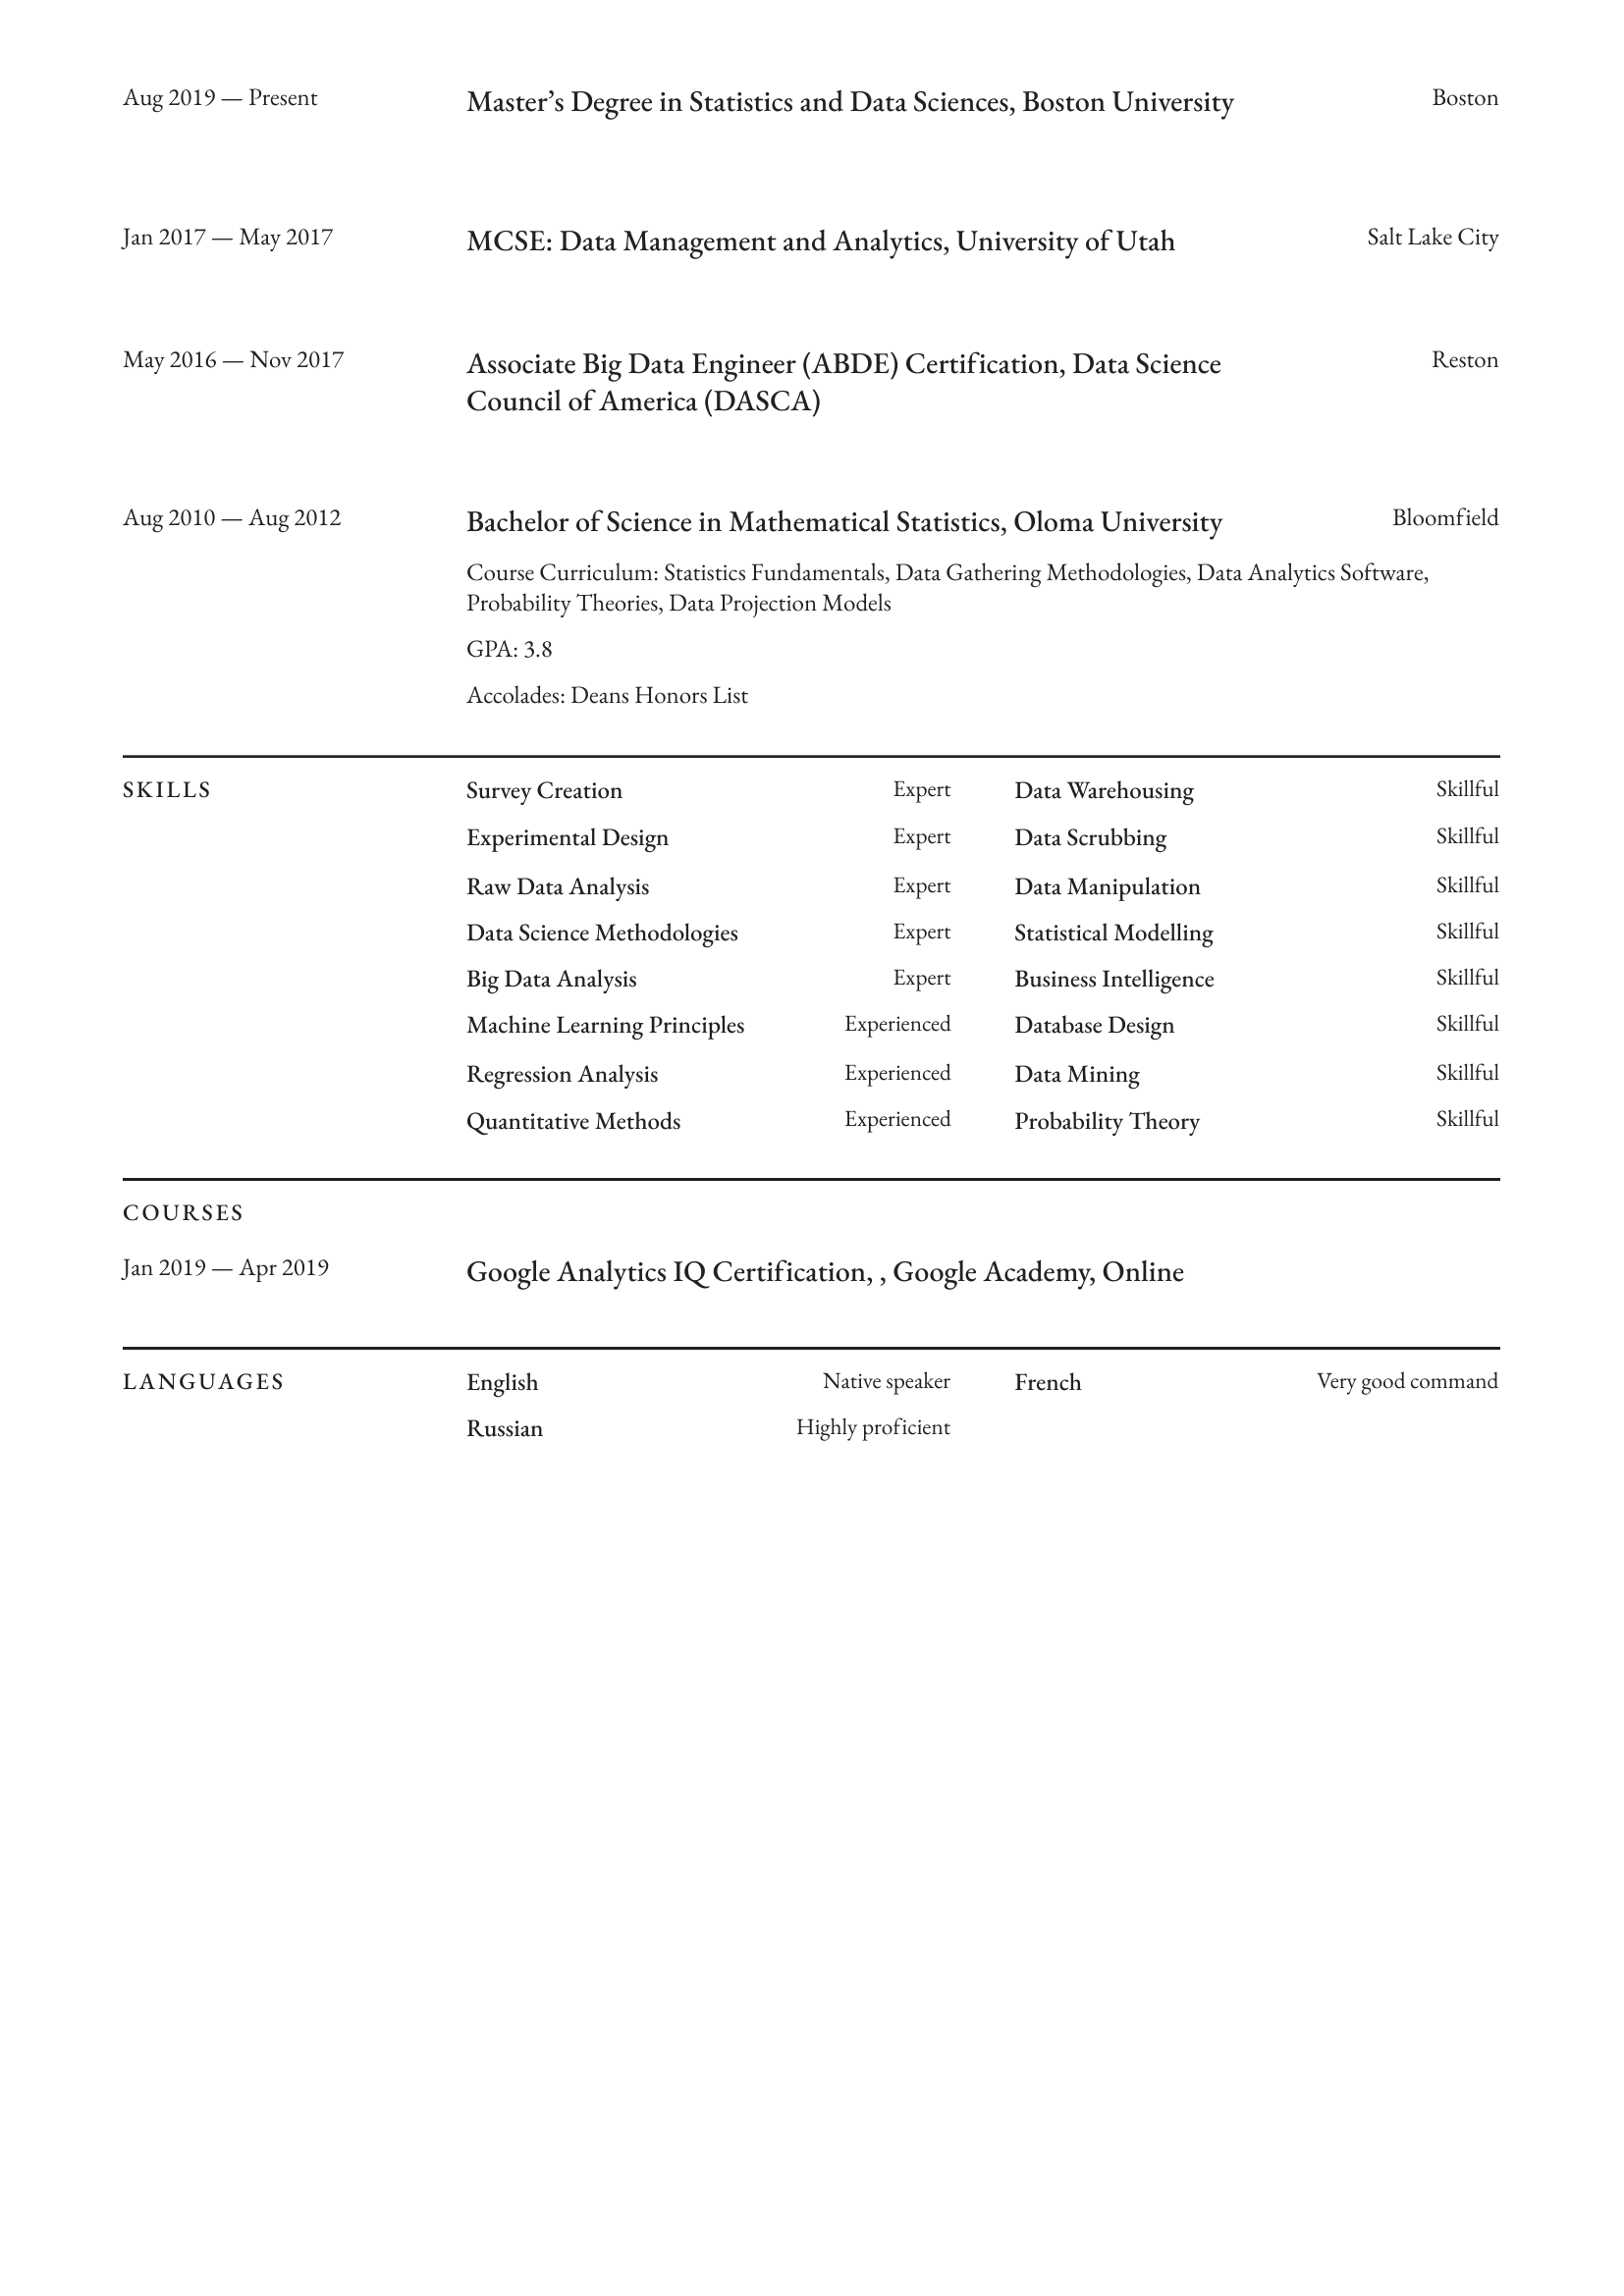

In [ ]:
display(images[1])

In [ ]:
bounds1 = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
bounds1

[([[588, 90], [1065, 90], [1065, 141], [588, 141]],
  'Lindsay Atkinson, Data Analyst',
  0.873624030874795),
 ([[373, 151], [1279, 151], [1279, 187], [373, 187]],
  '1515 Pacific Ave, Los Angeles, CA 90291, United States, (541) 754-3010, email@email.com',
  0.6546017722722511),
 ([[122, 250], [242, 250], [242, 274], [122, 274]],
  'Place ofbirth',
  0.7598868127352185),
 ([[672, 249], [800, 249], [800, 278], [672, 278]],
  'San Antonio',
  0.9955315261338326),
 ([[850, 249], [986, 249], [986, 280], [850, 280]],
  'Driving license',
  0.6993045711684206),
 ([[1486, 250], [1532, 250], [1532, 276], [1486, 276]],
  'Full',
  0.5760925164990716),
 ([[122, 297], [226, 297], [226, 323], [122, 323]],
  'Nationality',
  0.9368596094420253),
 ([[702, 298], [800, 298], [800, 324], [702, 324]],
  'American',
  0.9999742059909161),
 ([[122, 394], [208, 394], [208, 420], [122, 420]],
  'LINKS',
  0.9987610092455205),
 ([[472, 394], [748, 394], [748, 424], [472, 424]],
  'Linkedin, Twitter; Facebook

In [ ]:
bounds2 = reader.readtext(np.array(images[1]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
bounds2

[([[119, 82], [225, 82], [225, 123], [119, 123]],
  'Aug 2019',
  0.9224525642326594),
 ([[250, 86], [328, 86], [328, 112], [250, 112]],
  'Present',
  0.9999605749823047),
 ([[474, 88], [578, 88], [578, 120], [474, 120]],
  'Master $',
  0.8301931615627267),
 ([[574, 82], [1265, 82], [1265, 131], [574, 131]],
  'Degree in Statistics and Data Sciences, Boston University',
  0.7711190877841845),
 ([[1456, 86], [1530, 86], [1530, 112], [1456, 112]],
  'Boston',
  0.9999927972798476),
 ([[120, 228], [238, 228], [238, 256], [120, 256]],
  'Jan 2017 _',
  0.7254407643677557),
 ([[238, 224], [343, 224], [343, 260], [238, 260]],
  'May 2017',
  0.9998937454566141),
 ([[472, 224], [1204, 224], [1204, 272], [472, 272]],
  'MCSE: Data Management and Analytics, University of Utah',
  0.7356019382055896),
 ([[1389, 224], [1535, 224], [1535, 263], [1389, 263]],
  'Salt Lake City',
  0.974029154251117),
 ([[120, 350], [227, 350], [227, 387], [120, 387]],
  'May 2016',
  0.9999925399962877),
 ([[252,

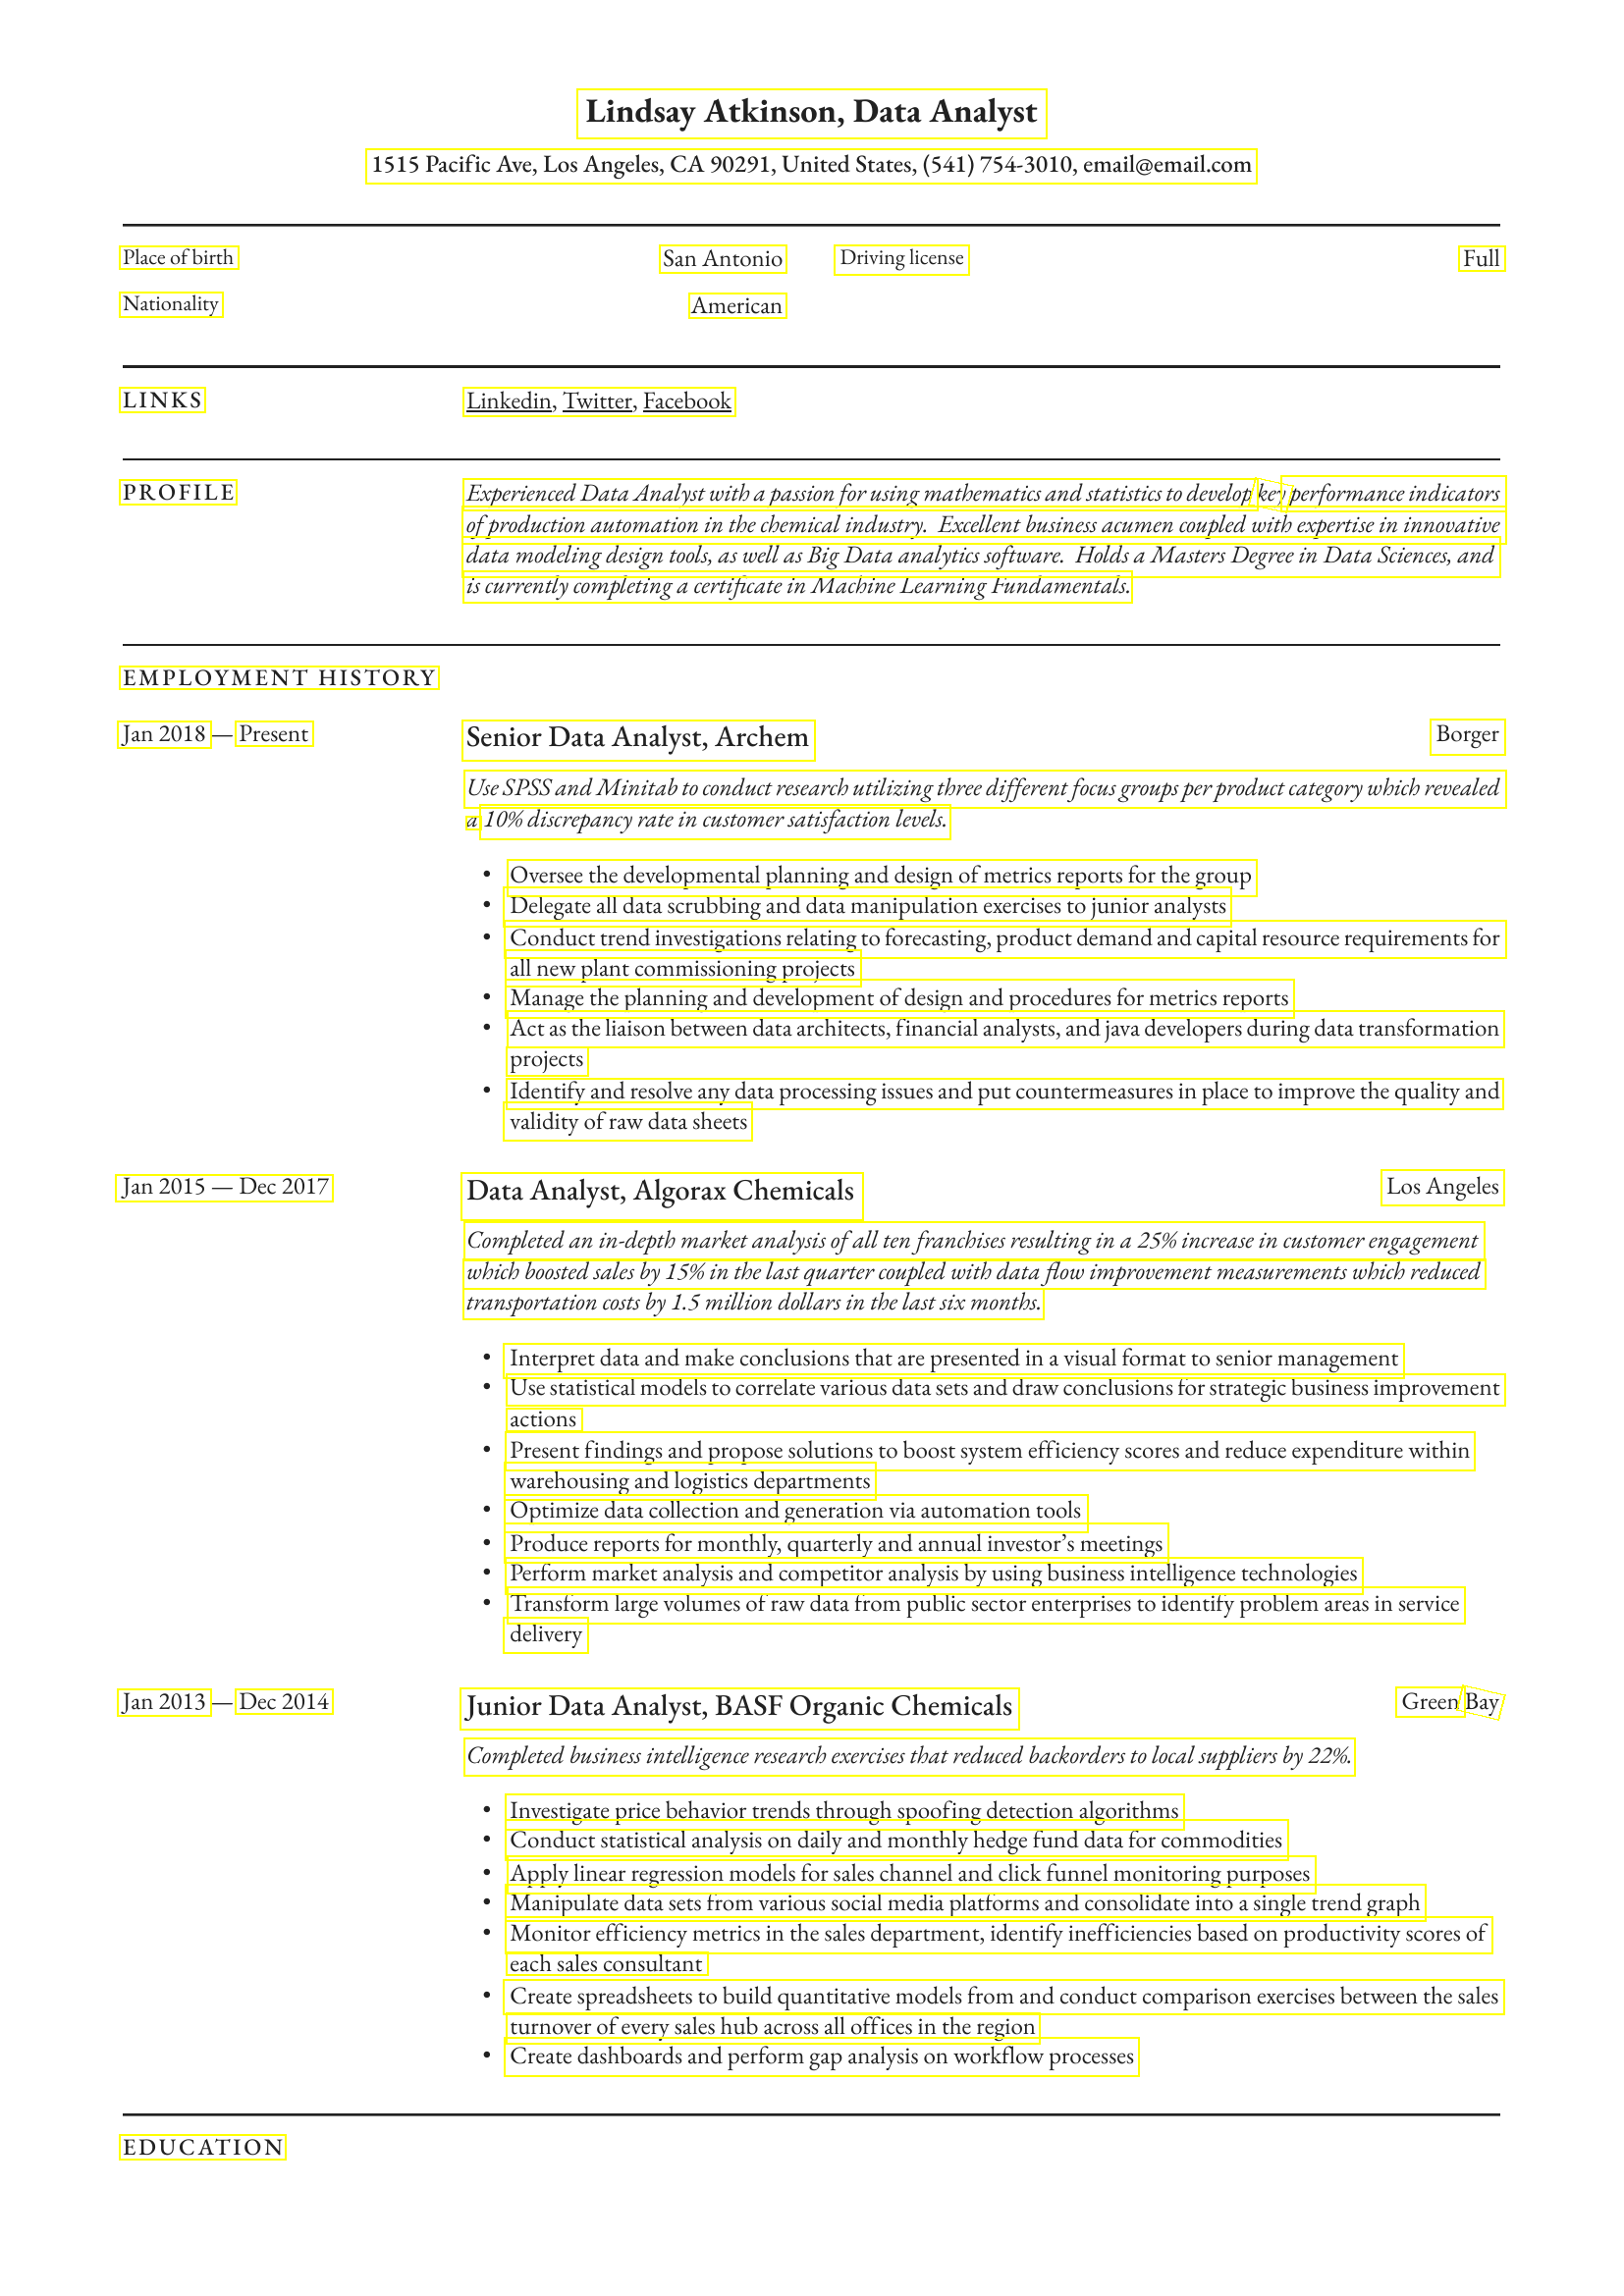

In [ ]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(images[0], bounds1)

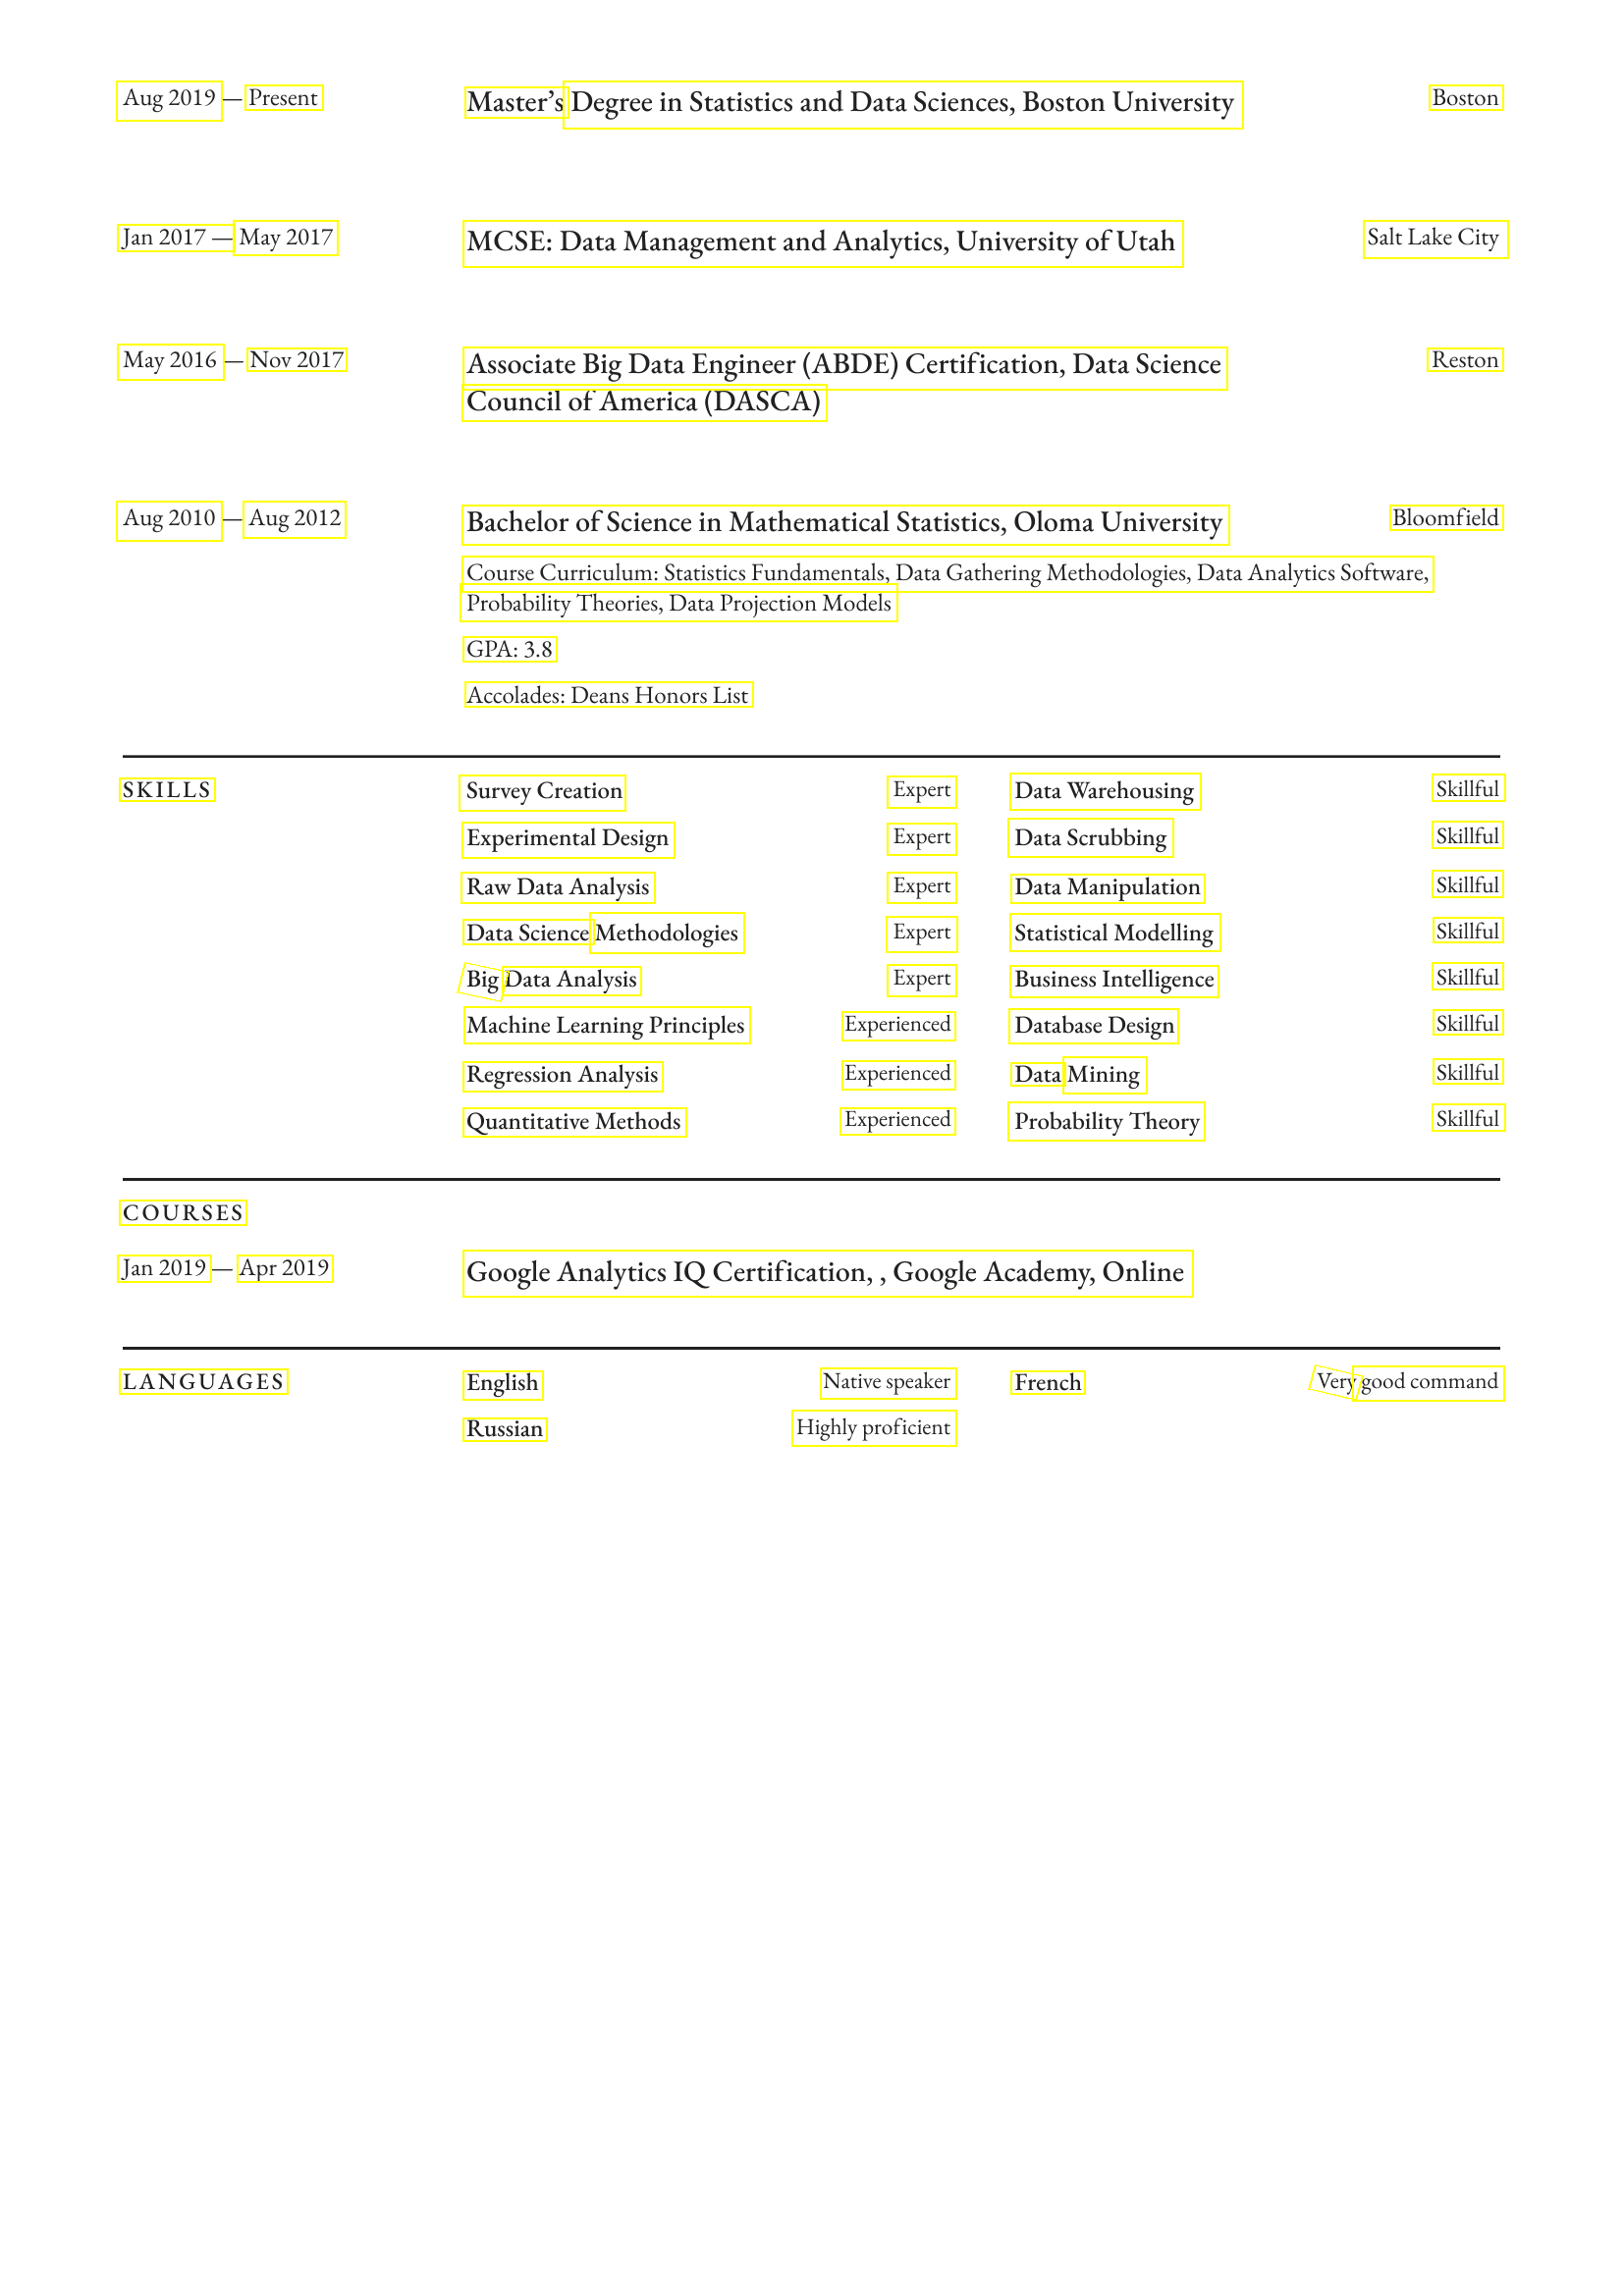

In [ ]:
draw_boxes(images[1], bounds2)

In [ ]:
bounds1[2][1]

'Place ofbirth'

In [ ]:
text1=''
text2=''
for i in range(len(bounds1)):
  text1 = text1 + bounds1[i][1] +'\n'
for i in range(len(bounds2)):
  text2 = text2 + bounds2[i][1] +'\n'
text=text1 + text2
text = " ".join(text.split('\n'))
print(text)

Lindsay Atkinson, Data Analyst 1515 Pacific Ave, Los Angeles, CA 90291, United States, (541) 754-3010, email@email.com Place ofbirth San Antonio Driving license Full Nationality American LINKS Linkedin, Twitter; Facebook PROFILE Experienced Data Analyst with a passion for using mathematics and statistics to develop 'performance indicators of production automation in the chemical industry Excellent busines acumen coupled with expertise in innovative data modeling design tools; as well as Big Data analytics software   Holds a Masters Degree in Data Sciences; and is currently completing a certificate in Machine Learning Fundamentals EMPLOYMENT HISTORY Jan 2018 Present Senior Data Analyst, Archem Borger Use SPSS and Minitab to conduct research utilizing three different focus groups per product category wbich revealed 4 10 discrepancy rate in customer satisfaction levels Oversee the developmental planning and design of metrics reports for the group Delegate al data scrubbing and data manipu

In [ ]:
# spaCy
!python -m spacy download en_core_web_md

2023-06-08 21:19:28.992737: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 19.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
nlp=spacy.load('en_core_web_md')

In [ ]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
#doc = nlp(text)
doc = nlp(" Manthan Venkataramana Shenoy and i work as a Data Scientist in hyderabad. With 10 years of experience")

In [ ]:
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

Manthan Venkataramana Shenoy PERSON
Data Scientist ORG
hyderabad GPE
10 years DATE


In [ ]:
from spacy import displacy

displacy.render(nlp(doc.text),style='ent', jupyter=True)

2. pymupdf

In [ ]:
!pip install PyMuPDF ## gives error with gpu  https://pymupdf.readthedocs.io/en/latest/tutorial.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 50.2 MB/s eta 0:00:00


In [ ]:
import fitz
fname = 'Data-Analyst-Resume-2.pdf'
#fname= 'data-scientist-1559725114.pdf'
doc = fitz.open(fname)
text = ""
for page in doc:
    text = text + str(page.get_text())

tx = " ".join(text.split('\n'))
print(tx)

Lindsay Atkinson, Data Analyst 1515 Pacific Ave, Los Angeles, CA 90291, United States, (541) 754-3010, email@email.com Place of birth San Antonio Nationality American Driving license Full LINKS Linkedin, Twitter, Facebook PROFILE Experienced Data Analyst with a passion for using mathematics and statistics to develop key performance indicators  of production automation in the chemical industry.  Excellent business acumen coupled with expertise in innovative  data modeling design tools, as well as Big Data analytics software.  Holds a Masters Degree in Data Sciences, and  is currently completing a certiLcate in Machine Fearning Uundamentals. EMPLOYMENT HISTORY Jan 2018 — Present Senior Data Analyst, Archem Borger Pse SzSS and Minitab to conduct research utili1ing three different focus groups per product category which revealed  a 0%C discrepancy rate in customer satisfaction levels. • Oversee the developmental planning and design of metrics reports for the group • Delegate all data scrub

In [ ]:
doc = nlp(tx)

In [ ]:
displacy.render(nlp(doc.text),style='ent', jupyter=True)

In [ ]:
#import re
# Remove extra spaces between words
#text = re.sub(r'\s+', ' ', tx)

# Remove leading and trailing spaces
#text = text.strip()

# Print the result
#print(text)

In [ ]:
#doc = nlp(text)
#displacy.render(nlp(doc.text),style='ent', jupyter=True)

In [ ]:
fname= 'data-scientist-1559725114.pdf'
doc = fitz.open(fname)
text = ""
for page in doc:
    text = text + str(page.get_text())

tx = " ".join(text.split('\n'))
print(tx)

Data Scientist ROBERT SMITH Phone: (123) 456 78 99  Email: info@qwikresume.com Website: www.qwikresume.com LinkedIn: linkedin.com/qwikresume Address: 1737 Marshville Road, Alabama. Objective Data Scientist with PhD in Physics and 1+ industrial experience. Two years of working experience  in Data Analysis team of LIGO Scientific Collaboration [$3M Special Breakthrough Prize winner of  2016]. Over ten years of successful research experience in both theoretical and computational  physics. Strong problem-solving and analytical skills. Advanced programming proficiency. Certified in Data Analysis and Machine Learning. Skills Data Mining, Data Analysis, Machine Learning, Python, R, MATLAB, Sphinx, LaTeX, Mathematica,  Maple, GIT, CVS, HTCondor. Work Experience Data Scientist ABC Corporation ­ May 1994 – May 2005   Assisted in determining client needs, deliverable design, estimates and feasibility for  analytical projects concerning a custom study for a manufacturer who is using the results t

In [ ]:
num_pages = doc.page_count
print("Number of pages in the resume:", num_pages)
doc.close()

Number of pages in the resume: 2


In [ ]:
doc = nlp(tx)
displacy.render(nlp(doc.text),style='ent', jupyter=True)

In [ ]:
import spacy

def extract_entities(resume_text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(resume_text)

    persons = []
    locations = []

    for ent in doc.ents:
        if ent.label_ == "PERSON":
            persons.append(ent.text)
        elif ent.label_ == "GPE":
            locations.append(ent.text)

    return persons, locations

persons, locations = extract_entities(tx)

print("Persons:", persons[0])
print("Locations:", locations[0])


Persons: ROBERT SMITH
Locations: Alabama


3.OCRmyPDF

In [ ]:
!pip install ocrmypdf # required if it is a scanned document


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!apt update
!apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 44 not upgraded.


In [ ]:
!apt-get install ghostscript
!apt-get install libexempi3
!apt-get install libffi6
!apt-get install pngquant
!apt-get install python3.6
!apt-get install qpdf
#!apt-get install tesseract-ocr
!apt-get install unpaper

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 libgs9 libgs9-common
  libidn11 libijs-0.35 libjbig2dec0 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript libgs9
  libgs9-common libidn11 libijs-0.35 libjbig2dec0 poppler-data
0 upgraded, 10 newly installed, 0 to remove and 44 not upgraded.
Need to get 12.7 MB of archives.
After this operation, 51.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 fonts-droid-fallback all 1:6.0.1r16-1.1 [1,805 kB]
Get:2 h

In [ ]:
!ocrmypdf Data-Analyst-Resume-2.pdf output.pdf


Scanning contents: 100% 2/2 [00:00<00:00, 14.21page/s]
Start processing 2 pages concurrently
OCR:   0% 0.0/2.0 [00:00<?, ?page/s]
PriorOcrFoundError: page already has text! - aborting (use --force-ocr to force OCR;  see also help for the arguments --skip-text and --redo-ocr


 PymuPDF perfroms adequate for the current task. The current easyOCR can be used as well as it only misses some characters from the extracted text. but easyOCR and OCRmyPDF would be necessary if it is scanned document.

# Resume Parser

In [ ]:
# spaCy
#!python -m spacy download en_core_web_sm

# nltk
!python -m nltk.downloader words stopwords

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#!pip install nltk

!pip install spacy==2.3.5

!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz

#!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.9/en_core_web_sm-2.3.9.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 15.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached thinc-7.4.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
  Using cached wasabi-0.10.1-py3-none-any.whl (26 kB)
  Using cached srsly-1.0.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (209 kB)
  Using cached catalogue-1.0.2-py2.py3-none-any.whl (16 kB)
  Using cached plac-1.1.3-py2.py3-none-any.whl (20 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for spacy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for sp

In [ ]:
!python -m spacy validate

✔ Loaded compatibility table

====================== Installed models (spaCy v2.3.9) ======================
ℹ spaCy installation: /usr/local/lib/python3.10/dist-packages/spacy

TYPE      NAME             MODEL            VERSION                            
package   en-core-web-sm   en_core_web_sm   2.3.1   ✔



In [ ]:
!pip install pyresparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 105.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 89.1 MB/s eta 0:00:00
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3957 sha256=027efa989550eb570b756c87a7c17183344994b1ba357092b88d29adb534da5c
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt


In [ ]:
from pyresparser import ResumeParser # uses pdfminer  ## check "utils.py" to know more about text extraction

In [ ]:
data1 = ResumeParser('./Data-Analyst-Resume-2.pdf').get_extracted_data()

In [ ]:
print(data1)

{'name': 'Lindsay Atkinson', 'email': 'email@email.com', 'mobile_number': '754-3010', 'skills': ['Visual', 'System', 'Research', 'Java', 'Forecasting', 'Investigate', 'Analytics', 'Spreadsheets', 'Investigations', 'Chemicals', 'Design', 'Facebook', 'Green', 'English', 'Statistical analysis', 'Click', 'Service delivery', 'Mining', 'Gap analysis', 'C', 'R', 'Logistics', 'Improvement', 'Experimental', 'Statistics', 'Automation', 'Commissioning', 'Transportation', 'Certification', 'Database', 'P', 'Metrics', 'Sales', 'Mathematics', 'Modeling', 'Twitter', 'Analysis', 'Engagement', 'Data management', 'Workflow', 'Reports', 'Algorithms', 'French', 'Key performance indicators'], 'college_name': None, 'degree': ['Bachelor of Science in Mathematical Statistics, Oloma University'], 'designation': ['Machine Learning Principles', 'Associate Big Data Engineer'], 'experience': None, 'company_names': None, 'no_of_pages': 2, 'total_experience': 0}


In [ ]:
data2 = ResumeParser('data-scientist-1559725114.pdf').get_extracted_data()
print(data2)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_training' (0.0.0) requires spaCy v2.1 and is incompatible with the current spaCy version (2.3.9). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


{'name': 'Data Scientist', 'email': 'info@qwikresume.com', 'mobile_number': None, 'skills': ['Analytical', 'Etl', 'Aws', 'Research', 'Email', 'Litigation', 'Analytics', 'Matlab', 'Design', 'Machine learning', 'Mining', 'R', 'Cloud', 'Reporting', 'Spark', 'Sphinx', 'Python', 'Conversion', 'Data analysis', 'Automation', 'Programming', 'Scala', 'Website', 'Analysis', 'Documentation', 'Physics', 'Algorithms', 'Process'], 'college_name': None, 'degree': None, 'designation': None, 'experience': ['Data Scientist', 'ABC Corporation\xa0\xad\xa0May 1994 – May 2005', '\uf09f Assisted in determining client needs, deliverable design, estimates and feasibility for'], 'company_names': None, 'no_of_pages': 2, 'total_experience': 11.0}


In [ ]:
data3 = ResumeParser('Resume-Software-Developer-10.pdf').get_extracted_data()
print(data3)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_training' (0.0.0) requires spaCy v2.1 and is incompatible with the current spaCy version (2.3.9). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


{'name': 'Elliot Alderson', 'email': 'rozenboomchantal@gmail.com', 'mobile_number': '890-555-0401', 'skills': ['Workflow', 'Protocols', 'Email', 'Js', 'Agile', 'Python', 'Data analytics', 'Process', 'Analytics', 'Ecommerce', 'Technical', 'Writing', 'Engineering', 'Java', 'Startup', 'Swift', 'Ios', 'Prototype', 'Process improvements', 'Mvp', 'Mobile', 'Android', 'Scrum'], 'college_name': None, 'degree': None, 'designation': None, 'experience': ['applications. Proficient in full-stack development, particularly the MEAN stack.', '02 EMPLOYMENT HISTORY', '11/2015 – 11/2017', 'Software Developer at Johnson & Johnson', 'San Francisco, CA', 'Johnson & Johnson is a Fortune 500 Medical Device and Manufacturing company in the US.', 'As a Software Developer, I work on their eCommerce platform in an Agile environment. My', 'daily responsibilities include:', 'Participating in daily stand up meetings, led by our Scrum Master', 'Utilizing the MEAN stack to enhance and maintain our eCommerce platform'

Observations:

1. The ResumeParser library has NER trained on Resume samples and the output provide is not adequate for the task. For eg, it mostly misses the "total_experience", and also does not get the right data in "skills".
2. overall the perfromance maybe and using Custom trained NER-Spacy model on resume dataset with PyMuPDF for text extraction.




In [ ]:
!pip install resume-parser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# spaCy
#!python -m spacy download en_core_web_sm

# nltk
!python -m nltk.downloader stopwords
!python -m nltk.downloader punkt
!python -m nltk.downloader averaged_perceptron_tagger
!python -m nltk.downloader universal_tagset
!python -m nltk.downloader wordnet
!python -m nltk.downloader brown
!python -m nltk.downloader maxent_ne_chunker

2023-06-07 16:47:37.500073: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 80.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data

In [ ]:
!pip install spacy==2.3.5

!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 43.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached thinc-7.4.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
  Using cached wasabi-0.10.1-py3-none-any.whl (26 kB)
  Using cached srsly-1.0.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (209 kB)
  Using cached catalogue-1.0.2-py2.py3-none-any.whl (16 kB)
  Using cached plac-1.1.3-py2.py3-none-any.whl (20 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for spacy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for sp

In [ ]:
from resume_parser import resumeparse

/usr/local/lib/python3.10/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_training' (0.0.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.9). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
data = resumeparse.read_file('Data-Analyst-Resume-2.pdf')

2023-06-07 16:53:25,422 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
2023-06-07 16:53:26,043 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
2023-06-07 16:53:26,478 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [ ]:
print(data)

{'email': 'email@email.com', 'phone': '(541) 754-3010', 'name': '', 'total_exp': 0, 'university': ['boston university', 'university of utah'], 'designition': ['data analyst', 'senior data analyst', 'investor', 'junior data analyst', 'sales consultant', 'data management', 'associate', 'big data engineer', 'data engineer'], 'degree': [], 'skills': ['sales channel', 'minitab', 'data science', 'architects', 'twitter', 'f', 'countermeasures', 'command', 'dashboards', 'forecasting', 'data modeling', 'service delivery', 'fundamentals', 'key performance indicators', 'linear regression', 'scrubbing', 'processing', 'english', 'data warehousing', 'google', 'developmental', 'c', 'public sector', 'customer engagement', 'lake', 'hedge fund', 'o', 'regression analysis', 'data manipulation', 'strategic business', 'probability theory', 'd', 'boost', 'data processing', 'design', 'metrics', 'business acumen', 'los angeles', 'draw', 'quantitative models', 'interpret', 'resolve', 'suppliers', 'gap', 'faceb

In [ ]:
data = resumeparse.read_file('data-scientist-1559725114.pdf')
print(data)

{'email': 'info@qwikresume.com', 'phone': '', 'name': 'Data Scientist', 'total_exp': 12, 'university': [], 'designition': ['data scientist', 'scientist'], 'degree': ['PhD in Physics and 1', '©', 'PhD'], 'skills': ['Data Mining', ' Data Analysis', ' Machine Learning', ' Python', ' R', ' MATLAB', ' Sphinx', ' LaTeX', ' Mathematica', '', 'Maple', ' GIT', ' CVS', ' HTCondor.'], 'Companies worked at': []}
